In [3]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 411 kB/s eta 0:00:01


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

In [38]:
filename = 'ID_data_mass_18122012.xlsx'
df = pd.read_excel(filename, sheet_name='VU')

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [39]:
df

,№,Дата,Глубина манометра,Dшт,осредненные_параметры_Руст,осредненные_параметры_Рзаб,осредненные_параметры_Pлин,на_конец_режима_Руст,на_конец_режима_Рзаб,на_конец_режима_Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ_2
0,804,2008-06-05,3576.3,7.94,249.6,370.1,101.8,249.0,359.6,101.8,...,-,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094,NaN
1,804,2008-06-06,3576.3,9.53,233.5,364.6,101.3,231.0,338.1,102.4,...,-,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003,NaN
2,804,2008-06-07,3576.3,11.11,213.4,357.1,101.6,211.0,314.8,100.6,...,-,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906,NaN
3,804,2008-06-08,3576.3,12.70,191.6,347.4,98.4,187.0,291.5,99,...,-,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591,NaN
4,804,2008-06-09,3576.3,14.29,171.9,337.7,99.2,169.0,270.3,99.5,...,-,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,22505,2009-09-23,3678,12.70,182.2,271.586,93.255111,179.0,258.6,92.702141,...,60.8,89.7,88.527017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,22505,2009-09-27,3678,14.29,157.0,249.076,96.472143,153.0,233.5,100.060417,...,60.8,87.3,86.158401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,22505,2010-04-09,3679.5,7.94,211.9,289.3877,91.131226,208.0,289.6,91.304642,...,61.3,88.2,87.046632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,22505,2010-04-14,3679.5,9.53,204.0,282.8709,91.173008,201.0,275.3,91.616821,...,61.3,88.5,87.342709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Target: G_total, КГФ

In [40]:
df.drop(columns=['КГФ_2'], inplace=True) #просто другая размерность

In [41]:
object_columns = df.dtypes[df.dtypes==object].index
df = df.replace(['-', 'не спускался', '#ЗНАЧ!'] , np.nan)
df = df.replace(r'(\d+)(,)(\d+)(,)', r'\1.\3', regex=True) # ,->.

In [42]:
df[object_columns] = df[object_columns].apply(pd.to_numeric)

In [43]:
df.dtypes

№                                                   int64
Дата                                       datetime64[ns]
Глубина манометра                                 float64
Dшт                                               float64
осредненные_параметры_Руст                        float64
осредненные_параметры_Рзаб                        float64
осредненные_параметры_Pлин                        float64
на_конец_режима_Руст                              float64
на_конец_режима_Рзаб                              float64
на_конец_режима_Рлин                              float64
Туст                                              float64
Тна шлейфе                                        float64
Тзаб                                              float64
Tлин                                              float64
Стандартные условия Дебит газа                    float64
Стандартные условия Дебит ст. конд.               float64
Стандартные условия Дебит воды                    float64
Стандартные ус

### Удалить строки, где обе целевых переменные пустые

In [44]:
df = df.dropna(subset=['G_total', 'КГФ'], how='all')

In [45]:
df

,№,Дата,Глубина манометра,Dшт,осредненные_параметры_Руст,осредненные_параметры_Рзаб,осредненные_параметры_Pлин,на_конец_режима_Руст,на_конец_режима_Рзаб,на_конец_режима_Рлин,...,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
0,804,2008-06-05,3576.3,7.94,249.600000,370.1,101.800000,249.0,359.6,101.800,...,56.5,NaN,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094
1,804,2008-06-06,3576.3,9.53,233.500000,364.6,101.300000,231.0,338.1,102.400,...,56.5,NaN,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003
2,804,2008-06-07,3576.3,11.11,213.400000,357.1,101.600000,211.0,314.8,100.600,...,56.5,NaN,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906
3,804,2008-06-08,3576.3,12.70,191.600000,347.4,98.400000,187.0,291.5,99.000,...,56.5,NaN,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591
4,804,2008-06-09,3576.3,14.29,171.900000,337.7,99.200000,169.0,270.3,99.500,...,56.5,NaN,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,22503,2009-01-28,3284.0,12.70,215.000000,307.8,98.600000,215.0,308.1,97.200,...,40.5,41.6,94.4,93.165556,NaN,782.0,NaN,0.660000,NaN,153.0000
164,22503,2009-02-01,3284.0,14.29,198.000000,293.6,98.500000,197.0,293.9,98.400,...,40.5,41.6,94.0,92.770787,NaN,782.0,NaN,0.660000,NaN,147.0000
165,22503,2010-08-16,3288.6,7.94,231.229167,309.1,92.600000,230.0,307.1,92.700,...,NaN,NaN,89.9,88.724402,NaN,779.6,NaN,0.668000,NaN,182.0000
166,22503,2010-08-20,3288.6,11.11,217.201681,293.9,93.100000,215.0,293.9,93.300,...,NaN,NaN,90.8,89.612633,NaN,779.6,NaN,0.668000,NaN,145.0000


In [46]:
df['КГФ'].isna().sum()

0

In [47]:
df['G_total'].isna().sum()

70

In [48]:
np.sort(df['G_total'].to_numpy())

array([ 2.78262271,  3.07654201,  3.69778133,  3.72443158,  4.23236977,
        4.24855301,  4.51507275,  4.58764476,  4.71450298,  5.17016561,
        5.21767271,  5.2509151 ,  5.7278704 ,  5.76489998,  5.76509204,
        5.77531416,  5.83318196,  6.41826341,  7.27518907,  8.40053365,
        9.3275721 ,  9.63691686, 10.93115515,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

### Разбиение признаков

#### G_total

<AxesSubplot:ylabel='Frequency'>

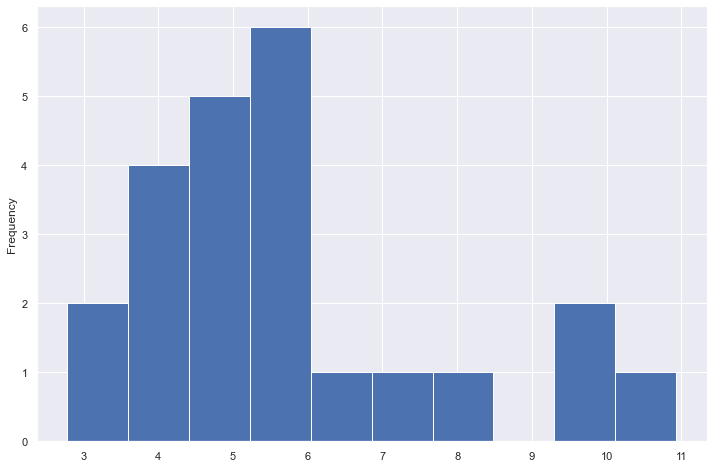

In [49]:
df['G_total'].plot(kind='hist')

In [50]:
pd.qcut(df['G_total'], q=4).value_counts()

(2.782, 4.382]     6
(4.382, 5.251]     6
(6.126, 10.931]    6
(5.251, 6.126]     5
Name: G_total, dtype: int64

In [51]:
df['G_total_qcut'] = pd.qcut(df['G_total'], q=4)

#### КГФ

<AxesSubplot:ylabel='Frequency'>

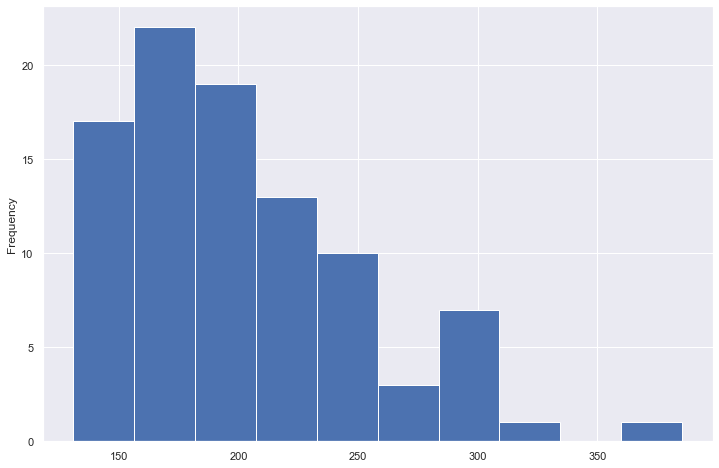

In [52]:
df['КГФ'].plot(kind='hist')

In [53]:
pd.qcut(df['КГФ'], q=8).value_counts()

(130.999, 152.5]      12
(152.5, 164.0]        12
(179.0, 192.0]        12
(208.0, 224.0]        12
(262.841, 385.416]    12
(164.0, 179.0]        11
(192.0, 208.0]        11
(224.0, 262.841]      11
Name: КГФ, dtype: int64

In [54]:
pd.qcut(df['КГФ'], q=8)

0      (262.841, 385.416]
1      (262.841, 385.416]
2        (224.0, 262.841]
3          (208.0, 224.0]
4          (208.0, 224.0]
              ...        
163        (152.5, 164.0]
164      (130.999, 152.5]
165        (179.0, 192.0]
166      (130.999, 152.5]
167      (130.999, 152.5]
Name: КГФ, Length: 93, dtype: category
Categories (8, interval[float64, right]): [(130.999, 152.5] < (152.5, 164.0] < (164.0, 179.0] < (179.0, 192.0] < (192.0, 208.0] < (208.0, 224.0] < (224.0, 262.841] < (262.841, 385.416]]

In [55]:
df['КГФ_qcut'] = pd.qcut(df['КГФ'], q=8)

### Gain ratio

In [56]:
def entropy(freq, T):
    freq = freq[freq!=0]
    return -(freq/T * np.log2(freq/T)).sum()


def conditional_entropy(counts, T):
    info_t_i = np.array([entropy(counts.loc[idx], counts.loc[idx].sum()) for idx in counts.index.levels[0]])
    info_t_i *= counts.groupby(level=0).sum()/T
    return info_t_i.sum()


def split_info(counts, T):
    counts = counts[counts!=0]
    return -(counts.groupby(level=0).sum()/T * np.log2(counts.groupby(level=0).sum()/T)).sum()


def gain_ratio(variables, labels):
    df_tmp = pd.concat([variables.rename('var'), labels.rename('label')], axis=1)

    var_counts = df_tmp['var'].value_counts()
    label_counts = df_tmp['label'].value_counts()
    
    entropy_value = entropy(label_counts, len(df_tmp['label']))
    
    counts = df_tmp.groupby('var')['label'].value_counts()
    
    info_x_t = conditional_entropy(counts, len(df_tmp['var']))
    split_info_value = split_info(counts, len(df_tmp['label']))
    
    gain_ratio = (entropy_value-info_x_t)/split_info_value

    return gain_ratio

In [57]:
gain_ratio(df['Dшт'], df['G_total_qcut'])

0.6230145432239826

In [58]:
kgf_gain_ratios = {col: gain_ratio(df[col], df['КГФ_qcut']) for col in df.columns[:-4] }

In [59]:
df['Ro_w'].unique()

array([1000.,   nan])

In [60]:
del kgf_gain_ratios['Ro_w']

In [61]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

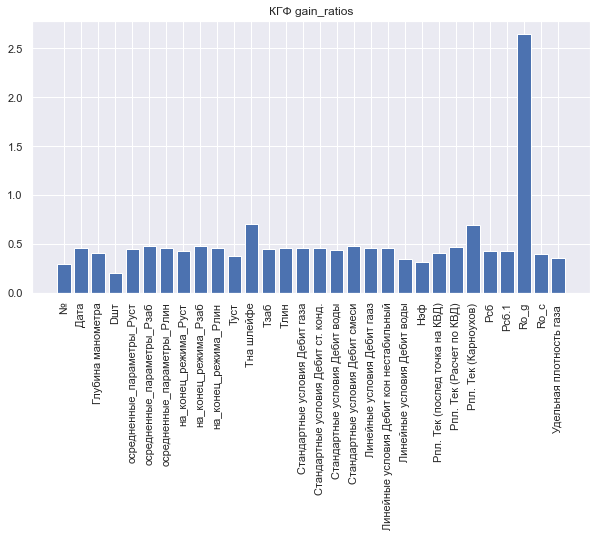

In [62]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.title("КГФ gain_ratios")
plt.xticks(rotation=90)
plt.bar(kgf_gain_ratios.keys(), kgf_gain_ratios.values())

In [63]:
df['Ro_g']

0      0.806017
1      0.806017
2      0.806017
3      0.806017
4      0.806017
         ...   
163         NaN
164         NaN
165         NaN
166         NaN
167         NaN
Name: Ro_g, Length: 93, dtype: float64

<AxesSubplot:>

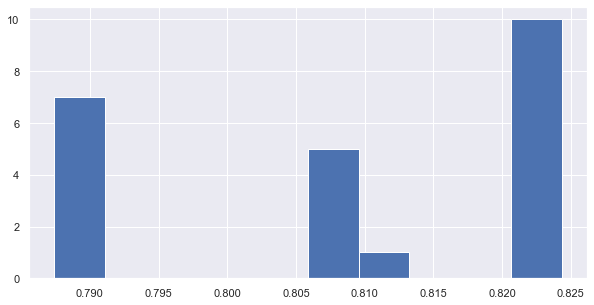

In [64]:
plt.figure(figsize=(10, 5))
df['Ro_g'].hist()

In [65]:
g_total_gain_ratios = {col: gain_ratio(df[col], df['G_total_qcut']) for col in df.columns[:-4] }

In [66]:
del g_total_gain_ratios['Ro_w']

<BarContainer object of 30 artists>

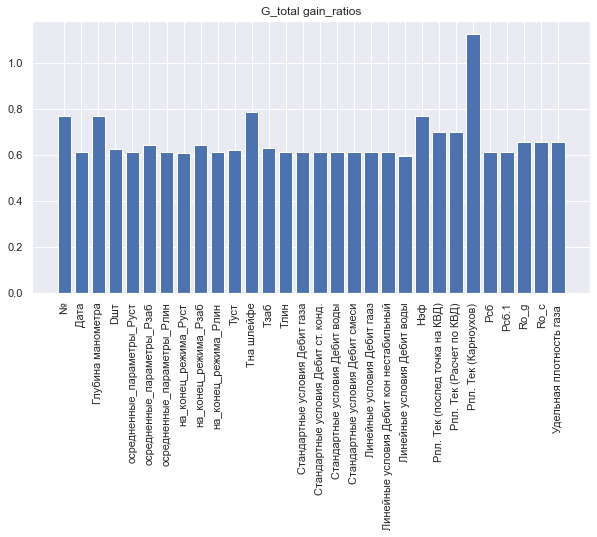

In [67]:
plt.figure(figsize=(10, 5))
plt.title("G_total gain_ratios")
plt.xticks(rotation=90)
plt.bar(g_total_gain_ratios.keys(), g_total_gain_ratios.values())

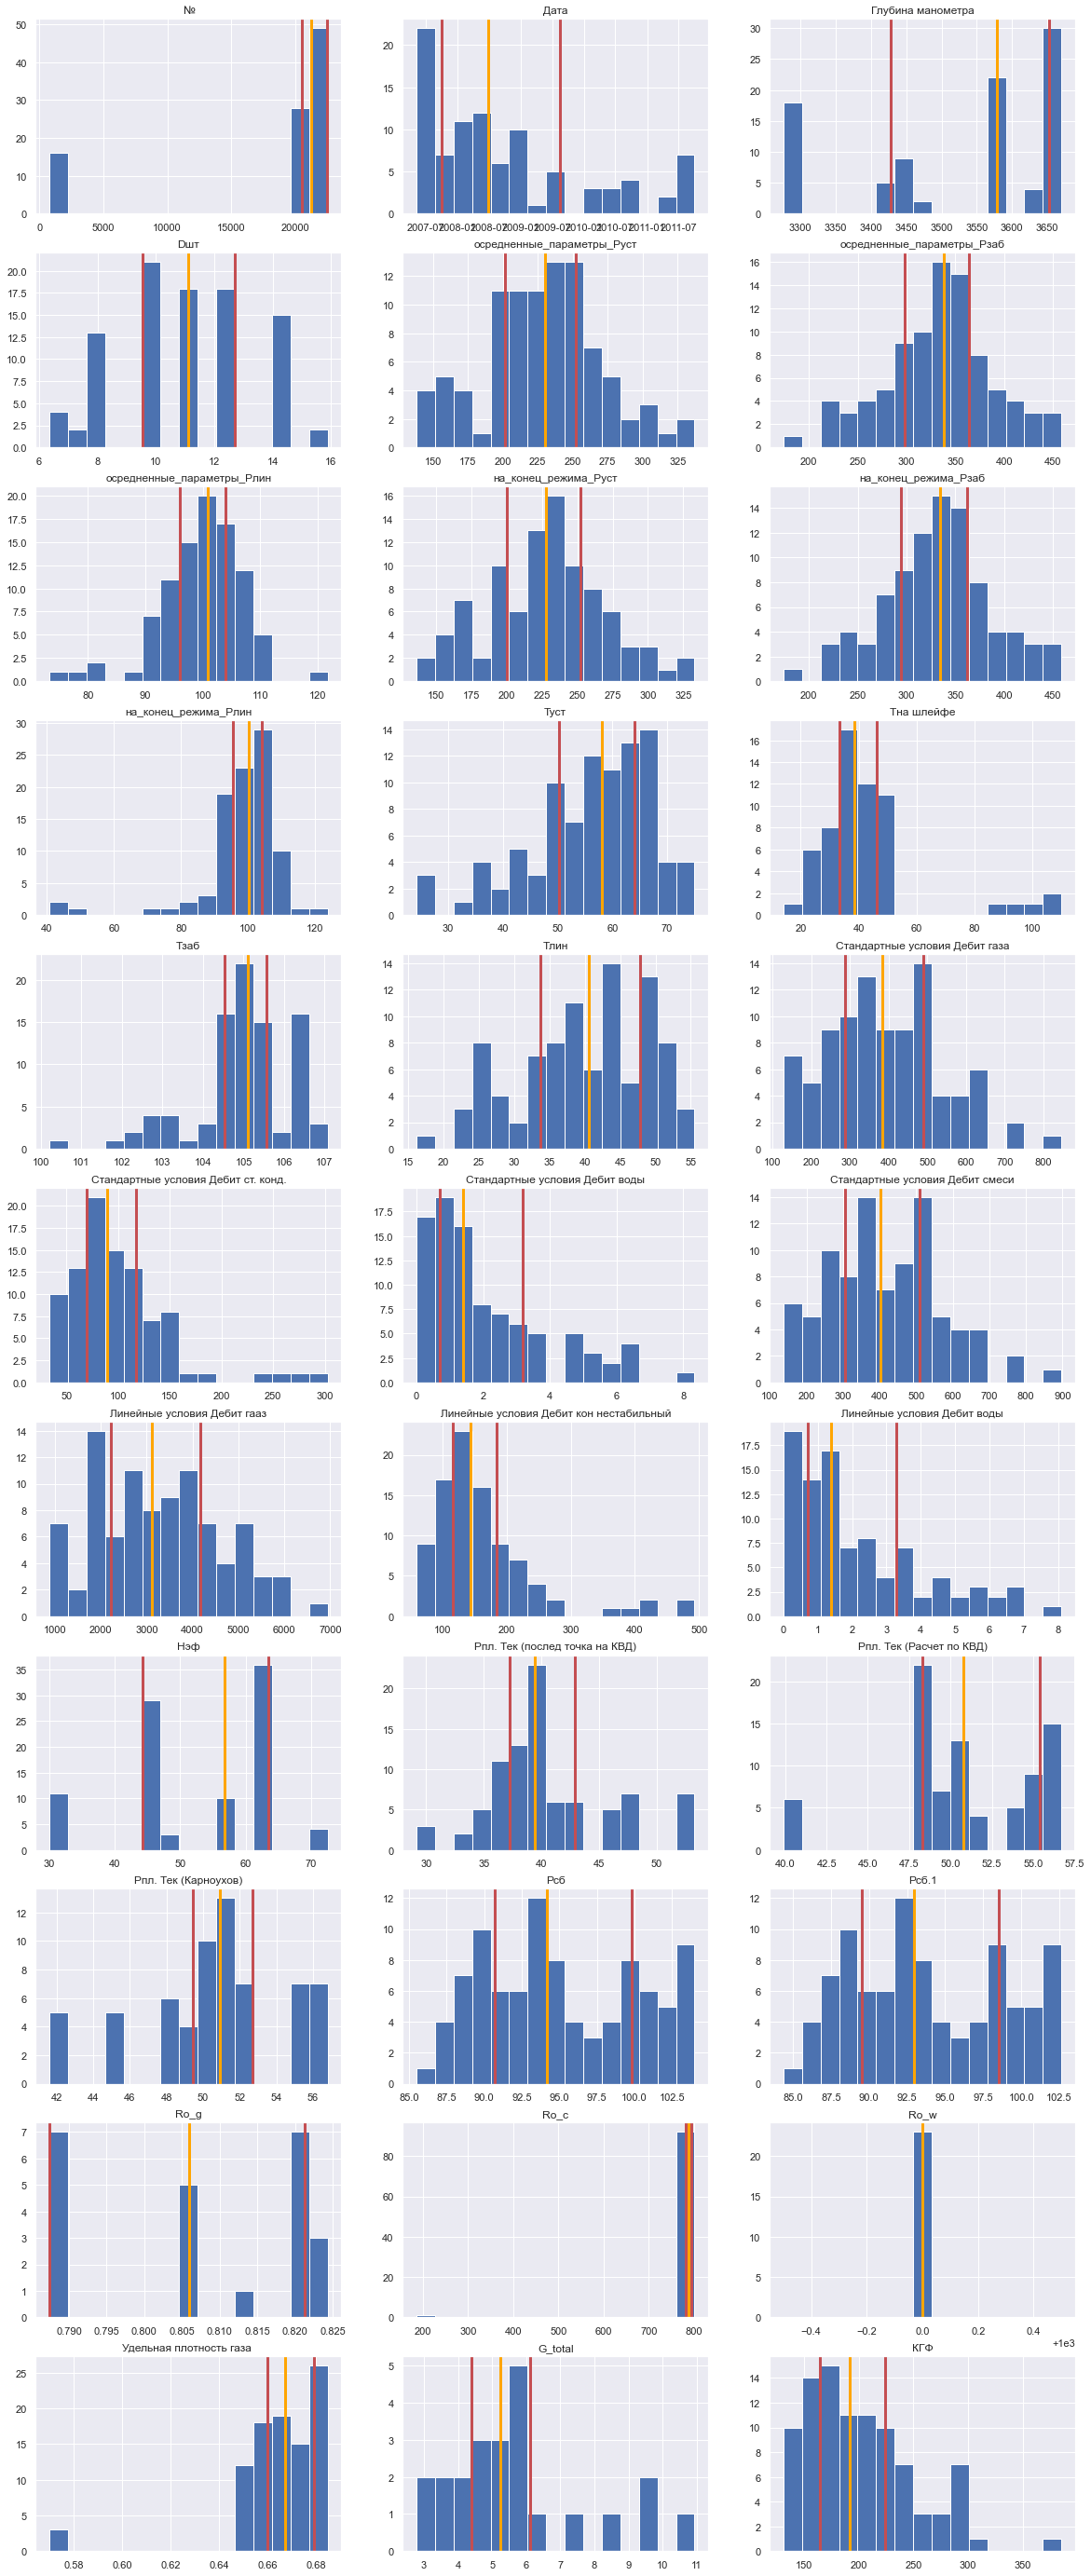

In [68]:
plt.figure(figsize=(20, 50))
for idx, col in enumerate(df.columns[:-2]):
    quartiles = df[col].quantile([0.25,0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    
    plt.subplot(11, 3, idx+1)
    plt.hist(df[col], 15)
    plt.title(col)
    linewidth = 3
    plt.axvline(x=q1, color='r', linewidth=linewidth)
    plt.axvline(x=q3, color='r', linewidth=linewidth)
    plt.axvline(x=df[col].median(), color='orange', linewidth=linewidth)


In [69]:
df.count()[df.count()<90]

Тна шлейфе                         60
Стандартные условия Дебит смеси    89
Рпл. Тек (послед точка на КВД)     88
Рпл. Тек (Расчет по КВД)           81
Рпл. Тек (Карноухов)               64
Ro_g                               23
Ro_w                               23
G_total                            23
G_total_qcut                       23
dtype: int64

<AxesSubplot:>

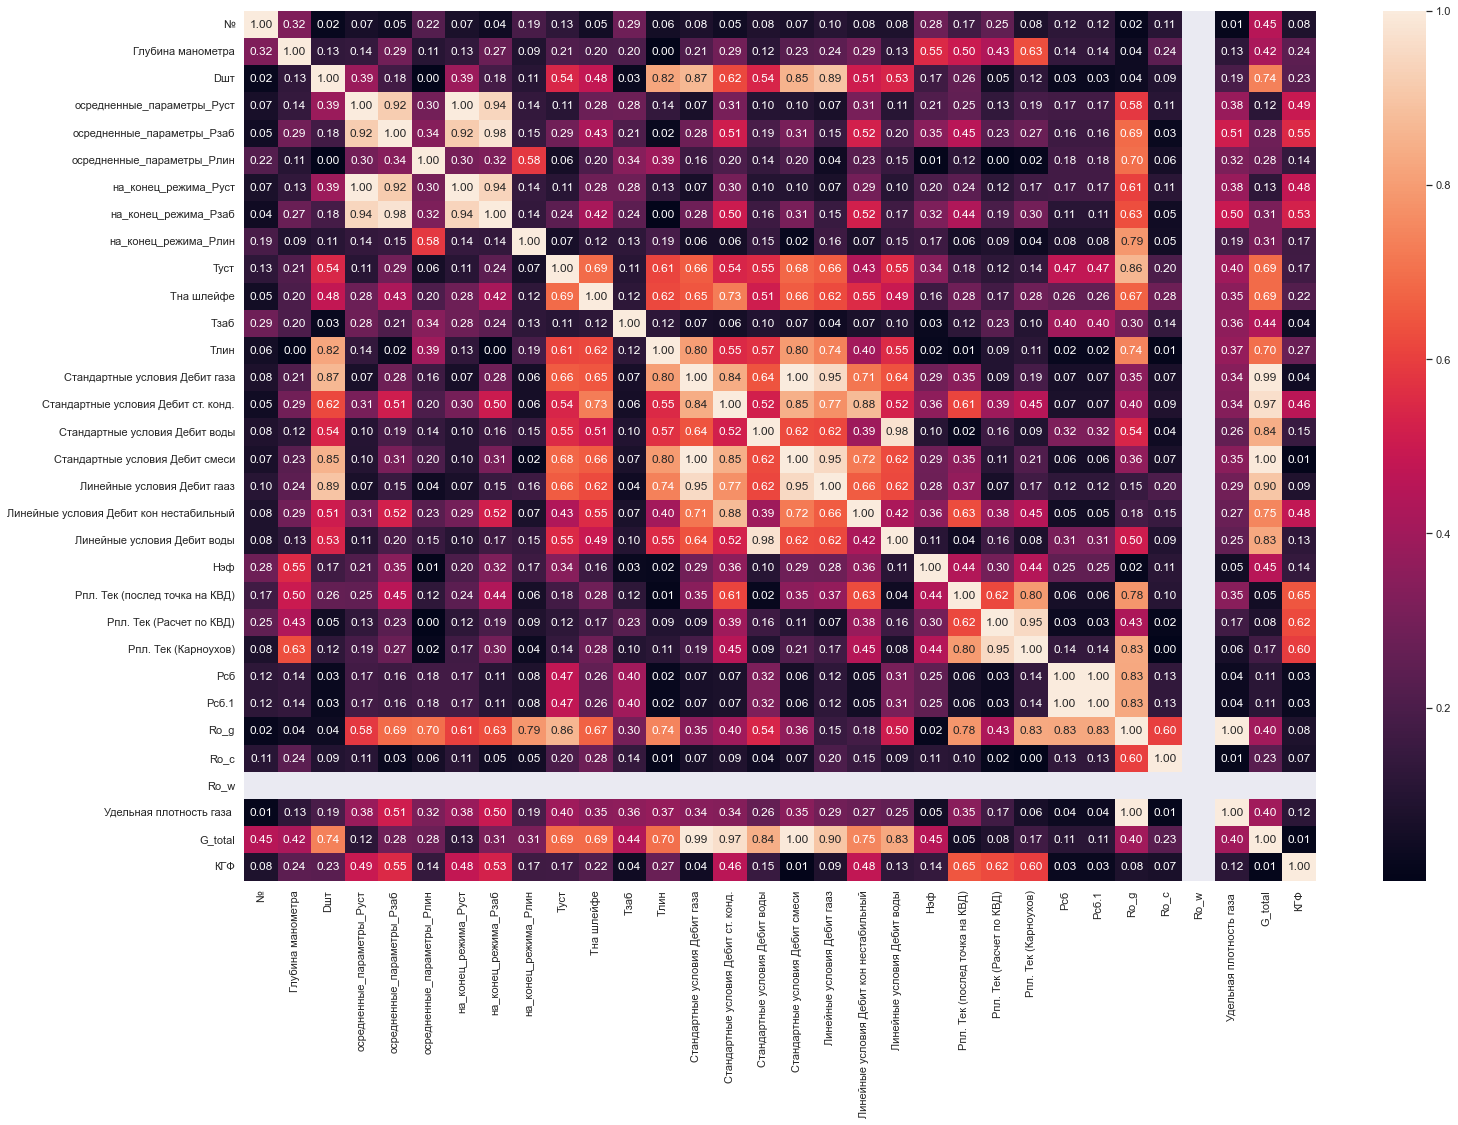

In [70]:
sns.set(rc={'figure.figsize':(24, 16)})
sns.heatmap(abs(df.corr()), annot=True, fmt='.2f')


# Оставляем:

    'Стандартные условия Дебит смеси': corr = 1 c G_total
    'Туст': corr = 0.69 c G_total
    'Тна шлейфе': corr = 0.69 c G_total
    'Tлин': corr = 0.7 c G_total

    'Линейные условия Дебит кон нестабильный': corr = 0.75 c G_total
  
    'Dшт': corr = 0.74 для G_total
    
    'Ro_g': высокий gain_ratio для КГФ 
    'Рпл. Тек (Карноухов)': высокий gain_ratio для G_total , corr = 0.6 с КГФ


# Удаляем:

## Строки:
    Выброс в Ro_c (значение 186)

## Столбцы:
    Ro_w - const
    '№' - нет корреляции с таргетами               
    'Дата' - нет корреляции с таргетами
    'Нэф' - нет корреляции с таргетами
    
    'Рпл. Тек (послед точка на КВД)' - корреляция с 'Рпл. Тек (Карноухов)'
    'Рпл. Тек (Расчет по КВД)' - корреляция с 'Рпл. Тек (Карноухов)'
    
    'Pсб' - нет корреляции с трагетами, низкий гейн-ретио
    'Pсб.1' - тоже самое, что и 'Рсб' 
  
    'Стандартные условия Дебит ст. конд.'  - мультиколлинеарность
    'Стандартные условия Дебит воды' - мультиколлинеарность
    
    'Стандартные условия Дебит газа' - мультиколлинеарность
    'Линейные условия Дебит гааз' - мультиколлинеарность
    
### Имеют низкий GR и отсуствует корреляция с таргетами    
    'Тзаб'
    'осредненные_параметры_Руст'
    'осредненные_параметры_Рзаб' 
    'осредненные_параметры_Pлин'
    'на_конец_режима_Руст'
    'на_конец_режима_Рзаб' 
    'на_конец_режима_Рлин'
    'Глубина манометра'
    'Ro_c'
    'Удельная плотность газа' 

In [71]:
cols = ['Ro_g' ,
'Туст',  
'Тна шлейфе', 
'Tлин', 
'Стандартные условия Дебит смеси',
'Линейные условия Дебит кон нестабильный',  
'Рпл. Тек (Карноухов)', 
'Dшт', 'G_total', 'КГФ' , ]

<AxesSubplot:>

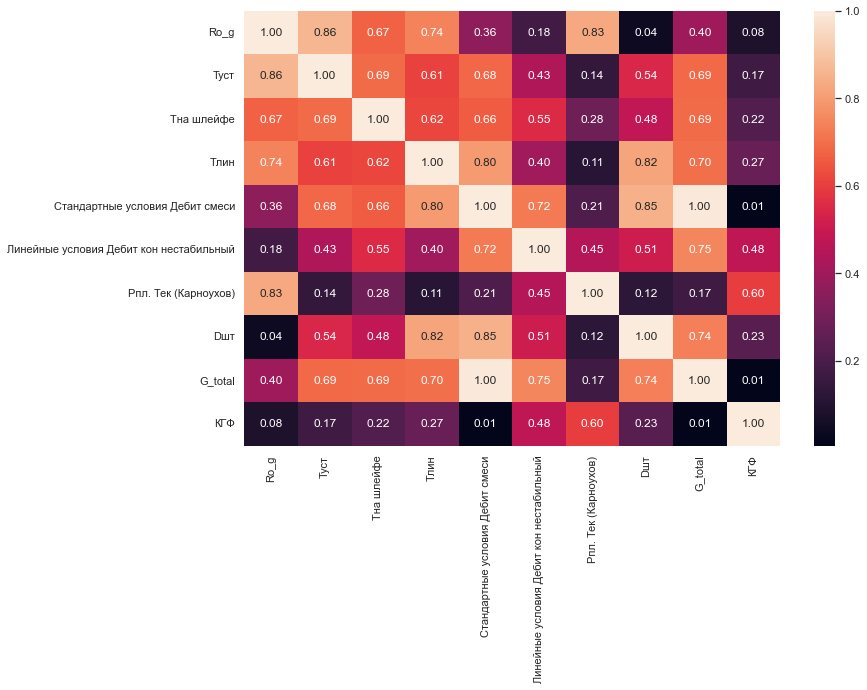

In [72]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(abs(df[cols].corr()), annot=True, fmt='.2f')
